In [0]:
# importing pandas
import pandas as pd

# importing numpy
import numpy as np

#importing dateutil
import dateutil

#importing matplotlib as plt
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
ls

drive/  sample_data/


In [0]:
df = pd.read_excel('/content/drive/My Drive/Dummy data/Load Survey Data (6).xlsx')

In [9]:
df.head()

,CCMS ID,Timestamp,KWh,KVAh,Vr (Volt),Vy (Volt),Vb (Volt),Ir (Amp),Iy (Amp),Ib (Amp),Freq (Hz),PF Total,Total Load
0,SMR03-0219-0252,2019-05-01 23:00:00,2.732,2.752,233.23,234.30,235.21,10.31,5.41,5.79,50.08,0.955 Ld,5.17
1,SMR03-0219-0252,2019-05-01 22:00:00,5.108,5.143,236.64,238.00,238.73,10.53,5.40,5.78,50.08,0.987 Ld,5.17
2,SMR03-0219-0252,2019-05-01 21:00:00,5.120,5.156,237.01,238.69,239.36,10.54,5.40,5.79,50.10,0.987 Ld,5.17
3,SMR03-0219-0252,2019-05-01 20:00:00,4.985,5.025,237.29,238.79,239.56,9.71,5.42,5.79,50.07,0.985 Ld,5.17
4,SMR03-0219-0252,2019-05-01 19:00:00,0.372,0.375,244.08,245.06,245.75,0.52,0.26,0.26,50.24,0.87 Lag,5.17


In [10]:
df.tail()

,CCMS ID,Timestamp,KWh,KVAh,Vr (Volt),Vy (Volt),Vb (Volt),Ir (Amp),Iy (Amp),Ib (Amp),Freq (Hz),PF Total,Total Load
737,SMR03-0219-0252,2019-04-01 04:00:00,5.141,5.175,238.13,237.55,237.05,10.39,4.97,6.35,50.12,0.987 Ld,5.17
738,SMR03-0219-0252,2019-04-01 03:00:00,5.142,5.176,237.62,237.19,236.74,10.45,5.01,6.38,49.96,0.987 Ld,5.17
739,SMR03-0219-0252,2019-04-01 02:00:00,5.089,5.124,236.01,235.67,235.23,10.49,5.03,5.94,50.03,0.986 Ld,5.17
740,SMR03-0219-0252,2019-04-01 01:00:00,5.024,5.060,234.46,234.13,233.58,10.57,5.06,5.98,50.12,0.987 Ld,5.17
741,SMR03-0219-0252,2019-04-01 00:00:00,5.028,5.062,231.67,231.34,230.90,10.75,5.15,6.07,50.08,0.987 Ld,5.17


In [0]:
#converting timestamp oject to datetime object
df['Timestamp'] = df['Timestamp'].apply(dateutil.parser.parse)

#list of columns to drop
drop_columns = ['Vr (Volt)','Vy (Volt)','Vb (Volt)','Ir (Amp)','Iy (Amp)','Ib (Amp)','Freq (Hz)']

#dropped columns dataframe
df_column_drop = df.drop(drop_columns,axis=1)

#changing column names
df_column_drop.columns = ['CCMS','timestamp','kwh','kvah','pf_total','total_load']

In [0]:
df = df.drop(drop_columns,axis=1)

In [13]:
df.head()

,CCMS ID,Timestamp,KWh,KVAh,PF Total,Total Load
0,SMR03-0219-0252,2019-05-01 23:00:00,2.732,2.752,0.955 Ld,5.17
1,SMR03-0219-0252,2019-05-01 22:00:00,5.108,5.143,0.987 Ld,5.17
2,SMR03-0219-0252,2019-05-01 21:00:00,5.120,5.156,0.987 Ld,5.17
3,SMR03-0219-0252,2019-05-01 20:00:00,4.985,5.025,0.985 Ld,5.17
4,SMR03-0219-0252,2019-05-01 19:00:00,0.372,0.375,0.87 Lag,5.17


In [14]:
df.describe()

,KWh,KVAh,Total Load
count,742.000000,742.000000,7.420000e+02
mean,2.139387,2.153534,5.170000e+00
std,2.296270,2.311301,4.799399e-14
min,0.000000,0.000000,5.170000e+00
25%,0.000000,0.000000,5.170000e+00
50%,0.480000,0.484000,5.170000e+00
75%,4.493000,4.520000,5.170000e+00
max,5.453000,5.489000,5.170000e+00


In [0]:
df = df[df.KWh != 0]

In [16]:
df.describe()

,KWh,KVAh,Total Load
count,381.000000,381.000000,3.810000e+02
mean,4.166470,4.194021,5.170000e+00
std,1.346872,1.355268,2.579104e-14
min,0.011000,0.013000,5.170000e+00
25%,4.261000,4.290000,5.170000e+00
50%,4.477000,4.508000,5.170000e+00
75%,5.113000,5.145000,5.170000e+00
max,5.453000,5.489000,5.170000e+00


In [17]:
print(df.reset_index().dtypes)

index                  int64
CCMS ID               object
Timestamp     datetime64[ns]
KWh                  float64
KVAh                 float64
PF Total              object
Total Load           float64
dtype: object


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


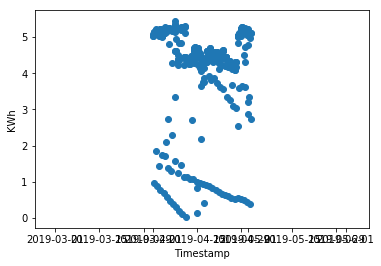

In [18]:
x_axis_timestamps = df.reset_index().Timestamp
y_axis_kwh = df.KWh
x_label = 'Timestamp'
y_label = 'KWh'
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x= x_axis_timestamps, y = y_axis_kwh)

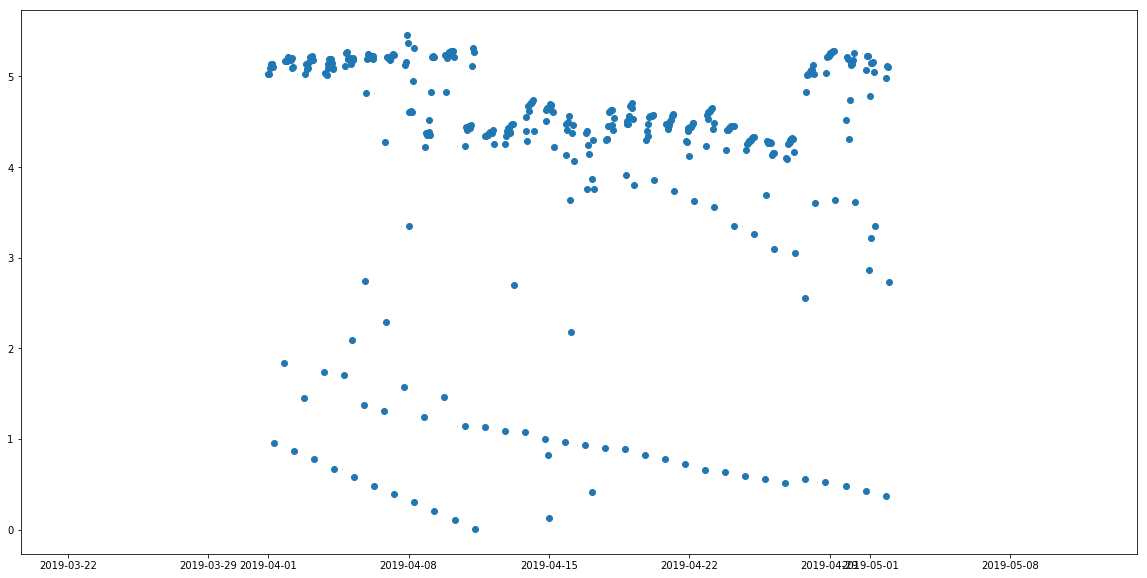

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(x= x_axis_timestamps, y = y_axis_kwh)